<a href="https://colab.research.google.com/github/DikshaNarang20/NLP-Jury/blob/main/wine_quality_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import torch
import numpy as np
import torchvision
import matplotlib
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torch.utils.data import DataLoader, TensorDataset, random_split

In [ ]:
dataframe_raw = pd.read_csv("/content/winequality-red.csv", delimiter= ';')
dataframe_raw.head(6)

In [6]:
dataframe_raw.shape


(1599, 12)

In [7]:
input_cols=list(dataframe_raw.columns)[:-1]
output_cols = ['quality']
input_cols,output_cols

(['fixed acidity',
  'volatile acidity',
  'citric acid',
  'residual sugar',
  'chlorides',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'density',
  'pH',
  'sulphates',
  'alcohol'],
 ['quality'])

<ipython-input-8-4913bcc14a92>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=dataframe_raw, palette='viridis')


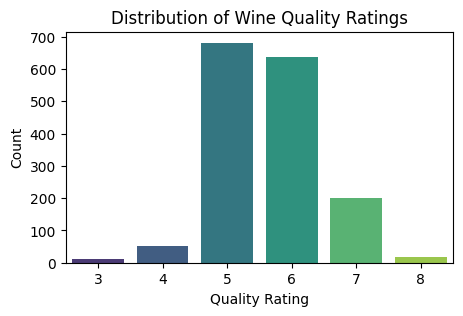

In [8]:
# Visualize distribution of quality ratings
plt.figure(figsize=(5, 3))
sns.countplot(x='quality', data=dataframe_raw, palette='viridis')
plt.title('Distribution of Wine Quality Ratings')
plt.xlabel('Quality Rating')
plt.ylabel('Count')
plt.show()

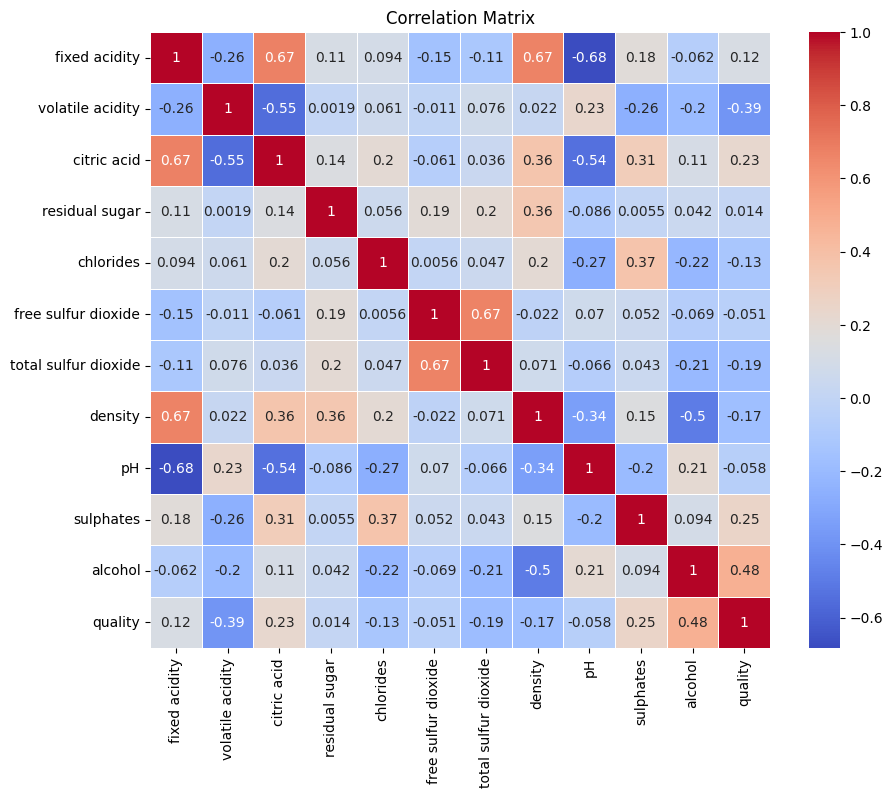

In [9]:
# Visualize correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = dataframe_raw.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [10]:
def dataframe_to_arrays(dataframe):
    # Make a copy of the original dataframe
    dataframe1 = dataframe_raw.copy(deep=True)
    # Convert non-numeric categorical columns to numbers
    #for col in categorical_cols:
        #dataframe1[col] = dataframe1[col].astype('category').cat.codes
    # Extract input & outupts as numpy arrays
    inputs_array = dataframe1[input_cols].to_numpy()
    targets_array = dataframe1[output_cols].to_numpy()
    return inputs_array, targets_array

In [11]:
inputs_array, targets_array = dataframe_to_arrays(dataframe_raw)
inputs_array, targets_array

(array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
        [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
        [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
        ...,
        [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
        [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
        [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]]),
 array([[5],
        [5],
        [5],
        ...,
        [6],
        [5],
        [6]]))

In [12]:
inputs = torch.from_numpy(inputs_array).type(torch.float)
targets = torch.from_numpy(targets_array).type(torch.float)
inputs,targets

(tensor([[ 7.4000,  0.7000,  0.0000,  ...,  3.5100,  0.5600,  9.4000],
         [ 7.8000,  0.8800,  0.0000,  ...,  3.2000,  0.6800,  9.8000],
         [ 7.8000,  0.7600,  0.0400,  ...,  3.2600,  0.6500,  9.8000],
         ...,
         [ 6.3000,  0.5100,  0.1300,  ...,  3.4200,  0.7500, 11.0000],
         [ 5.9000,  0.6450,  0.1200,  ...,  3.5700,  0.7100, 10.2000],
         [ 6.0000,  0.3100,  0.4700,  ...,  3.3900,  0.6600, 11.0000]]),
 tensor([[5.],
         [5.],
         [5.],
         ...,
         [6.],
         [5.],
         [6.]]))

In [13]:
print('Shape of input tensor and target tensor::  ',inputs.shape, targets.shape)
print('datatype of input tensor and target tensor::  ',inputs.dtype, targets.dtype)

Shape of input tensor and target tensor::   torch.Size([1599, 11]) torch.Size([1599, 1])
datatype of input tensor and target tensor::   torch.float32 torch.float32


In [14]:
#converting torch sensor to tensor dataset
dataset = TensorDataset(inputs, targets)
dataset

In [15]:
train_ds, val_ds = random_split(dataset, [1300, 299])
batch_size=20
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [16]:
for xb, yb in train_loader:
    print("inputs:", xb)
    print("targets:", yb)
    break

inputs: tensor([[7.0000e+00, 6.4000e-01, 2.0000e-02, 2.1000e+00, 6.7000e-02, 9.0000e+00,
         2.3000e+01, 9.9700e-01, 3.4700e+00, 6.7000e-01, 9.4000e+00],
        [6.6000e+00, 8.9500e-01, 4.0000e-02, 2.3000e+00, 6.8000e-02, 7.0000e+00,
         1.3000e+01, 9.9582e-01, 3.5300e+00, 5.8000e-01, 1.0800e+01],
        [1.0100e+01, 3.7000e-01, 3.4000e-01, 2.4000e+00, 8.5000e-02, 5.0000e+00,
         1.7000e+01, 9.9683e-01, 3.1700e+00, 6.5000e-01, 1.0600e+01],
        [7.1000e+00, 5.6000e-01, 1.4000e-01, 1.6000e+00, 7.8000e-02, 7.0000e+00,
         1.8000e+01, 9.9592e-01, 3.2700e+00, 6.2000e-01, 9.3000e+00],
        [6.9000e+00, 5.7000e-01, 0.0000e+00, 2.8000e+00, 8.1000e-02, 2.1000e+01,
         4.1000e+01, 9.9518e-01, 3.4100e+00, 5.2000e-01, 1.0800e+01],
        [1.0300e+01, 3.4000e-01, 5.2000e-01, 2.8000e+00, 1.5900e-01, 1.5000e+01,
         7.5000e+01, 9.9980e-01, 3.1800e+00, 6.4000e-01, 9.4000e+00],
        [1.0800e+01, 4.0000e-01, 4.1000e-01, 2.2000e+00, 8.4000e-02, 7.0000e+00,
     

In [17]:
#creating a linear regression model
print(xb.dtype,yb.dtype)


torch.float32 torch.float32


In [18]:
input_size = len(input_cols)
output_size = len(output_cols)
input_size,output_size

(11, 1)

In [19]:
class WineQuality(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size,output_size)

    def forward(self, xb):
        out = self.linear(xb)
        return out

    def training_step(self, batch):
        inputs, targets = batch
        # Generate predictions
        out = self(inputs)
        # Calcuate loss
        loss = F.l1_loss(out,targets)
        return loss

    def validation_step(self, batch):
        inputs, targets = batch
        # Generate predictions
        out = self(inputs)
        # Calculate loss
        loss = F.l1_loss(out,targets)
        return {'val_loss': loss.detach()}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        return {'val_loss': epoch_loss.item()}

    def epoch_end(self, epoch, result, num_epochs):
        # Print result every 100th epoch
        if (epoch+1) % 100 == 0 or epoch == num_epochs-1:
            print("Epoch [{}], val_loss: {:.4f}".format(epoch+1, result['val_loss']))

In [20]:
model=WineQuality()

In [21]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.1873, -0.0778, -0.0926, -0.1470,  0.2304,  0.1980,  0.1726,  0.0069,
          -0.2785, -0.1238,  0.1508]], requires_grad=True),
 Parameter containing:
 tensor([-0.1656], requires_grad=True)]

In [22]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result, epochs)
        history.append(result)
    return history

In [23]:
result = evaluate(model, val_loader)
print(result)

{'val_loss': 7.897068500518799}


In [24]:
epochs = 10
lr = 1e-2
history1 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [10], val_loss: 7.9819


In [25]:
epochs = 10
lr = 1e-3
history2 = fit(epochs, lr, model, train_loader, val_loader)


Epoch [10], val_loss: 0.6625


In [26]:
epochs = 10
lr = 1e-4
history3 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [10], val_loss: 0.5682


In [27]:
epochs = 10
lr = 1e-5
history4 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [10], val_loss: 0.5624


In [28]:
#model=WineQuality()
epochs = 15
lr = 1e-6
history5 = fit(epochs, lr, model, train_loader, val_loader)

Epoch [15], val_loss: 0.5652


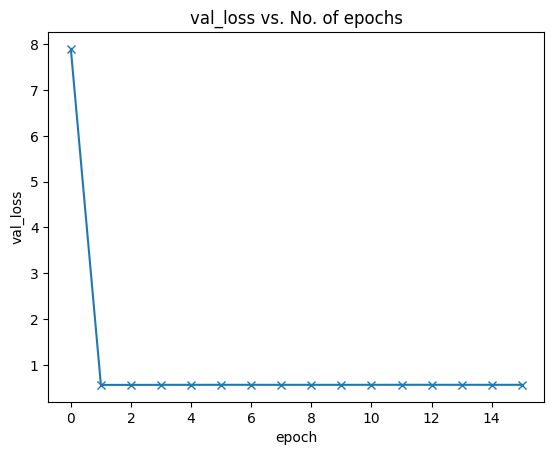

In [29]:
plt.title('val_loss vs. No. of epochs');
loss_mat = [res['val_loss'] for res in [result] + history5]
plt.plot(loss_mat, '-x')
plt.xlabel('epoch')
plt.ylabel('val_loss')

val_loss = loss_mat[-1]

In [30]:
def predict_single(input, target, model):
    inputs = input.unsqueeze(0)
    predictions = model(inputs)
    prediction = predictions[0].detach()
    print("Input:", input)
    print("Target:", target)
    print("Prediction:", prediction)

In [31]:
input, target = val_ds[10]
predict_single(input, target, model)

Input: tensor([11.5000,  0.1800,  0.5100,  4.0000,  0.1040,  4.0000, 23.0000,  0.9996,
         3.2800,  0.9700, 10.1000])
Target: tensor([6.])
Prediction: tensor([5.7424])


In [32]:
input, target = val_ds[62]
predict_single(input, target, model)

Input: tensor([ 8.9000,  0.6350,  0.3700,  1.7000,  0.2630,  5.0000, 62.0000,  0.9971,
         3.0000,  1.0900,  9.3000])
Target: tensor([5.])
Prediction: tensor([5.1203])
